# Proyecto de Fin de Módulo

**Por**: Sergio Rodrigo Cárdenas Rivera   
**Materia**: Aplicaciones de Ciencias de Datos

## 0. Preparación del entorno

In [1]:
# instalacion de librerias en local
%pip install pandas
%pip install matplotlib
%pip install numpy
%pip install scikit-learn
%pip install seaborn
%pip install xgboost
%pip install tensorflow


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Using cached scikit_learn-1.7.1-cp311-cp311-macosx_10_9_x86_64.whl.metadata (11 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 3.8 MB/s eta 0:00:00m eta 0:00:010:00:01
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

[notice] A new release of pip is available: 24.0 -

In [84]:
# importacion de librerias instaladas para ser utilizadas en todo el proyecto
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import IsolationForest

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, r2_score, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')


2025-08-22 21:18:48.090834: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 1. Descripción del problema

En este apartado se desarrolla una explicación clara sobre la relevancia del estudio.  
Se tiene información detallada sobre instituciones de educación superior en EEUU., y contiene datos de casi todas las universidades e instituciones de educación superior del país.  
El conjunto de datos incluye datos sobre las tasas de reembolso de préstamos estudiantiles, tasas de graduación, asequibilidad, ingresos después de la graduación y más.  
El objetivo de este conjunto de datos es ayudar a los estudiantes a tomar decisiones informadas sobre su elección universitaria, proporcionándoles información clara y concisa sobre el rendimiento de cada institución.  

Este proyecto realiza un Análisis Exploratorio de Datos (EDA) y desarrolla modelos de Machine Learning sobre un conjunto de datos de instituciones de educación superior en EE. UU. El objetivo es comprender los factores que influyen en el éxito estudiantil y financiero post-graduación y evaluar la viabilidad de predecir estos resultados.


A continuacion se realiza lo siguiente:

1. Presentación del conjunto de datos, 
2. Numero de columnas y significado de cada una de ellas, 
3. Número número de filas
4. Detalle de variables enteras, reales y de tipo objeto.

Con este estudio se busca responder a lo siguiente:

1. Qué factores explican mejor la tasa de deserciones universitarias?
2. Qué factores explican mejor los ingresos post-graduacion en EEUU?
3. Es posible precedir cuándo un estudiante va abandonar?

In [35]:
path_file = 'data/Most-Recent-Cohorts-Scorecard-Elements.csv'
df = pd.read_csv(path_file)
df.head()

,index,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,INSTURL,NPCURL,HCM2,...,RET_PTL4,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GT_25K_P6,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP
0,0,100654,100200,1002,Alabama A & M University,Normal,AL,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,0,...,NaN,0.8284,0.1049,30300,0.426,33888,347.789507913825,0.2370456303,NaN,0.32451962616822
1,1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,0,...,NaN,0.5214,0.2422,39700,0.665,21941.5,225.183648722001,0.5006735519,NaN,0.54610480182926
2,2,100690,2503400,25034,Amridge University,Montgomery,AL,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,0,...,NaN,0.7795,0.8540,40100,0.676,23370,239.844216240146,0.2904884319,NaN,PrivacySuppressed
3,3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,www.uah.edu,finaid.uah.edu/,0,...,NaN,0.4596,0.2640,45500,0.668,24097,247.305352106924,0.5278022948,NaN,0.47240649606299
4,4,100724,100500,1005,Alabama State University,Montgomery,AL,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,0,...,NaN,0.7554,0.1270,26600,0.36,33118.5,339.892198354698,0.1855174624,NaN,0.2574049608355


In [36]:
print("DataFrame Info:")
print(df.info())

colsFloat64 = df.select_dtypes(include=['float64']).columns
colsInt64 = df.select_dtypes(include=['int64']).columns
colsObject = df.select_dtypes(include=['object']).columns

dataDesc = pd.DataFrame({
    'Data Type': ['float64', 'integer64', 'object'],
    'Count': [
        len(colsFloat64), 
        len(colsInt64),
        len(colsObject)
    ]
})
dataDesc

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7703 entries, 0 to 7702
Columns: 123 entries, index to C150_4_POOLED_SUPP
dtypes: float64(103), int64(8), object(12)
memory usage: 7.2+ MB
None


,Data Type,Count
0,float64,103
1,integer64,8
2,object,12


Se tiene 7703 registros de diferentes instituciones y 123 columnas, donde 12 son categoricas o cadenas que no aportan significancia para el estudio.

In [6]:
colsFloat64.to_list()

['LOCALE',
 'HBCU',
 'PBI',
 'ANNHI',
 'TRIBAL',
 'AANAPII',
 'HSI',
 'NANTI',
 'MENONLY',
 'WOMENONLY',
 'RELAFFIL',
 'SATVR25',
 'SATVR75',
 'SATMT25',
 'SATMT75',
 'SATWR25',
 'SATWR75',
 'SATVRMID',
 'SATMTMID',
 'SATWRMID',
 'ACTCM25',
 'ACTCM75',
 'ACTEN25',
 'ACTEN75',
 'ACTMT25',
 'ACTMT75',
 'ACTWR25',
 'ACTWR75',
 'ACTCMMID',
 'ACTENMID',
 'ACTMTMID',
 'ACTWRMID',
 'SAT_AVG',
 'SAT_AVG_ALL',
 'PCIP01',
 'PCIP03',
 'PCIP04',
 'PCIP05',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP12',
 'PCIP13',
 'PCIP14',
 'PCIP15',
 'PCIP16',
 'PCIP19',
 'PCIP22',
 'PCIP23',
 'PCIP24',
 'PCIP25',
 'PCIP26',
 'PCIP27',
 'PCIP29',
 'PCIP30',
 'PCIP31',
 'PCIP38',
 'PCIP39',
 'PCIP40',
 'PCIP41',
 'PCIP42',
 'PCIP43',
 'PCIP44',
 'PCIP45',
 'PCIP46',
 'PCIP47',
 'PCIP48',
 'PCIP49',
 'PCIP50',
 'PCIP51',
 'PCIP52',
 'PCIP54',
 'DISTANCEONLY',
 'UGDS',
 'UGDS_WHITE',
 'UGDS_BLACK',
 'UGDS_HISP',
 'UGDS_ASIAN',
 'UGDS_AIAN',
 'UGDS_NHPI',
 'UGDS_2MOR',
 'UGDS_NRA',
 'UGDS_UNKN',
 'PPTUG_EF',
 'NPT4_PUB

In [7]:
colsInt64.to_list()

['index',
 'UNITID',
 'OPEID',
 'OPEID6',
 'HCM2',
 'PREDDEG',
 'CONTROL',
 'CURROPER']

In [8]:
colsObject.to_list()

['INSTNM',
 'CITY',
 'STABBR',
 'INSTURL',
 'NPCURL',
 'MD_EARN_WNE_P10',
 'GT_25K_P6',
 'GRAD_DEBT_MDN_SUPP',
 'GRAD_DEBT_MDN10YR_SUPP',
 'RPY_3YR_RT_SUPP',
 'C150_L4_POOLED_SUPP',
 'C150_4_POOLED_SUPP']

Para entender la estructura de este conjunto de datos se detalla el significado de cada uno de las variables presentes en el mismo. Se lograron identificar familias de variables detalladas a continuación:

1. **Identificación y localización**                                  

* **UNITID**: identificador único de IPEDS para la institución.
* **OPEID / OPEID6**: ID de la Office of Postsecondary Education (8 y 6 dígitos).
* **INSTNM, CITY, STABBR**: nombre, ciudad y estado (abreviatura) de la institución.
* **INSTURL / NPCURL**: web oficial / URL del Net Price Calculator. 


2. **Naturaleza de la institución**

* **CONTROL**: control de la institución (1 pública, 2 privada sin fines de lucro, 3 privada con fines de lucro).
* **PREDDEG**: título predominante que otorga (codificado según IPEDS/NSLDS; 0–4, p. ej. certificados, asociado, bachillerato, posgrado).
* **LOCALE**: código de entorno (urbano/suburbano/rural por tamaño).
* **HBCU, PBI, ANNHI, TRIBAL, AANAPII, HSI, MENONLY, WOMENONLY, RELAFFIL**: banderas de misión/afiliación (históricas/demográficas) y afiliación religiosa (códigos). 

3. **Admisión y tamaño**

* **ADM_RATE**: tasa de admisión (0–1).
* **SAT_AVG** (si está): promedio SAT admitidos.
* **UGDS**: matrícula de pregrado (headcount). 

4. **Costos y precio neto**
* **TUITIONFEE_IN / TUITIONFEE_OUT**: matrícula residentes/no residentes (USD).
* **NPT4_PUB / NPT4_PRIV y NPT41–NPT45**: precio neto promedio para quintiles de ingreso (por tipo de control). Ej.: NPT41_PRIV = precio neto promedio (ingresos más bajos) en privadas sin fines de lucro. 

5. **Ayuda financiera y composición**

* **PCTPELL**: % de estudiantes con Pell Grant.
* **PCTFLOAN**: % con préstamos federales.
* **UG25ABV**: % de alumnos ≥25 años. 

6. **Retención y graduación**

* **RET_FT4 / RET_PT4**: retención de tiempo completo / parcial (instituciones 4 años).
* **RET_FTL4 / RET_PTL4**: idem para <4 años.
* **C150_4_POOLED_SUPP / C150_L4_POOLED_SUPP**: graduación a 150% del tiempo (4 años / <4 años), valores “SUPP” si están suprimidos. 
?
7. **Deuda y repago**

* **GRAD_DEBT_MDN_SUPP**: deuda mediana acumulada de graduados (suprimida si corresponde).
* **GRAD_DEBT_MDN10YR_SUPP**: pago mensual estimado a 10 años sobre la deuda mediana (suprimido si corresponde).
* **RPY_3YR_RT_SUPP**: tasa de repago a 3 años (suprimida si corresponde). 

8. **Ingresos y umbrales**

* **MD_EARN_WNE_P10**: ingresos anuales medianos 10 años después de la entrada (trabajando y no inscritos).
* **GT_25K_P6**: % con ingresos > USD 25k a los 6 años desde la entrada.

In [38]:
# Se define las columnas que se van a seleccionar
selected_columns = [
    'INSTNM', # Instituion name 
    'CITY',   # city
    'C150_4_POOLED_SUPP',  # Completion rate
    'MD_EARN_WNE_P10',     # Median earnings 10 years after entry
    'UGDS',                # Undergrad population
    'RET_FT4',             # Retention rate, full-time
    'RET_PTL4',            # Retention rate, part time
    'RPY_3YR_RT_SUPP'      # Repayment rate
]

# Se crea un nuevo dataframe a partir del dataframe original
df_selected = df[selected_columns].copy()

# Se renombra las columnas para fines de lectura
df_selected = df_selected.rename(columns={
    'INSTNM': 'nombre_institucion', 
    'CITY': 'ciudad',   
    'C150_4_POOLED_SUPP': 'tasa_graduacion',
    'MD_EARN_WNE_P10': 'ingresos_medianos_10a', 
    'UGDS': 'poblacion_grado',
    'RET_FT4': 'tasa_retencion_ft',
    'RET_PTL4': 'tasa_retencion_pt',
    'RPY_3YR_RT_SUPP': 'tasa_reembolso_3a'
})

selected_columns = df_selected.columns.to_list()

df_selected

,nombre_institucion,ciudad,tasa_graduacion,ingresos_medianos_10a,poblacion_grado,tasa_retencion_ft,tasa_retencion_pt,tasa_reembolso_3a
0,Alabama A & M University,Normal,0.32451962616822,30300,4206.0,0.6595,NaN,0.2370456303
1,University of Alabama at Birmingham,Birmingham,0.54610480182926,39700,11383.0,0.8288,NaN,0.5006735519
2,Amridge University,Montgomery,PrivacySuppressed,40100,291.0,0.0000,NaN,0.2904884319
3,University of Alabama in Huntsville,Huntsville,0.47240649606299,45500,5451.0,0.7696,NaN,0.5278022948
4,Alabama State University,Montgomery,0.2574049608355,26600,4811.0,0.5725,NaN,0.1855174624
...,...,...,...,...,...,...,...,...
7698,Rasmussen College - Overland Park,Overland Park,NaN,NaN,NaN,NaN,NaN,0.2840145103
7699,National Personal Training Institute of Cleveland,Highland Heights,NaN,NaN,NaN,NaN,NaN,NaN
7700,Bay Area Medical Academy - San Jose Satellite ...,San Jose,NaN,NaN,NaN,NaN,NaN,NaN
7701,High Desert Medical College,Lancaster,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
#Metodo para mostrar información sobre valores
def build_df_with_null_and_invalid_values_prt_info(dataframe)->None:
    privacy_suppressed_counts = (dataframe == 'PrivacySuppressed').sum()
    privacy_suppressed_pct = (privacy_suppressed_counts / len(dataframe) * 100).round(2)

    info = pd.DataFrame({
        "column": dataframe.columns,
        "dtype": dataframe.dtypes.astype(str),
        "non_null": dataframe.notna().sum().values,
        "nulls": dataframe.isna().sum().values,
        "pct_null": (dataframe.isna().sum().values / len(dataframe) * 100).round(2),
        "privacy_suppressed": privacy_suppressed_counts.values,
        "pct_privacy_suppressed": privacy_suppressed_pct.values,
    }).sort_values("column").reset_index(drop=True)
    return info

In [40]:
df_info = build_df_with_null_and_invalid_values_prt_info(dataframe=df_selected)
df_info

,column,dtype,non_null,nulls,pct_null,privacy_suppressed,pct_privacy_suppressed
0,ciudad,object,7703,0,0.00,0,0.00
1,ingresos_medianos_10a,object,6534,1169,15.18,841,10.92
2,nombre_institucion,object,7703,0,0.00,0,0.00
3,poblacion_grado,float64,6990,713,9.26,0,0.00
4,tasa_graduacion,object,2497,5206,67.58,116,1.51
5,tasa_reembolso_3a,object,6801,902,11.71,573,7.44
6,tasa_retencion_ft,float64,2293,5410,70.23,0,0.00
7,tasa_retencion_pt,float64,2208,5495,71.34,0,0.00


In [41]:

def show_bar_plot_with_null_and_invalid_values_prt_info(dataframe) -> None:
    top_missing = dataframe.sort_values("pct_null", ascending=False)
    plt.figure(figsize=(12,7))

    plt.barh(top_missing["column"], top_missing["pct_null"], label="Missing (%)", color="blue")
    plt.barh(
        top_missing["column"], top_missing["pct_privacy_suppressed"],
        left=top_missing["pct_null"], 
        label="Privacy Suppressed (%)", color="skyblue")

    plt.gca().invert_yaxis()
    plt.title("Porcentaje de faltantes por columna")
    plt.xlabel("% faltantes")
    plt.ylabel("Variables")
    plt.legend(loc="lower right")  # Add legend
    plt.tight_layout()
    plt.show()

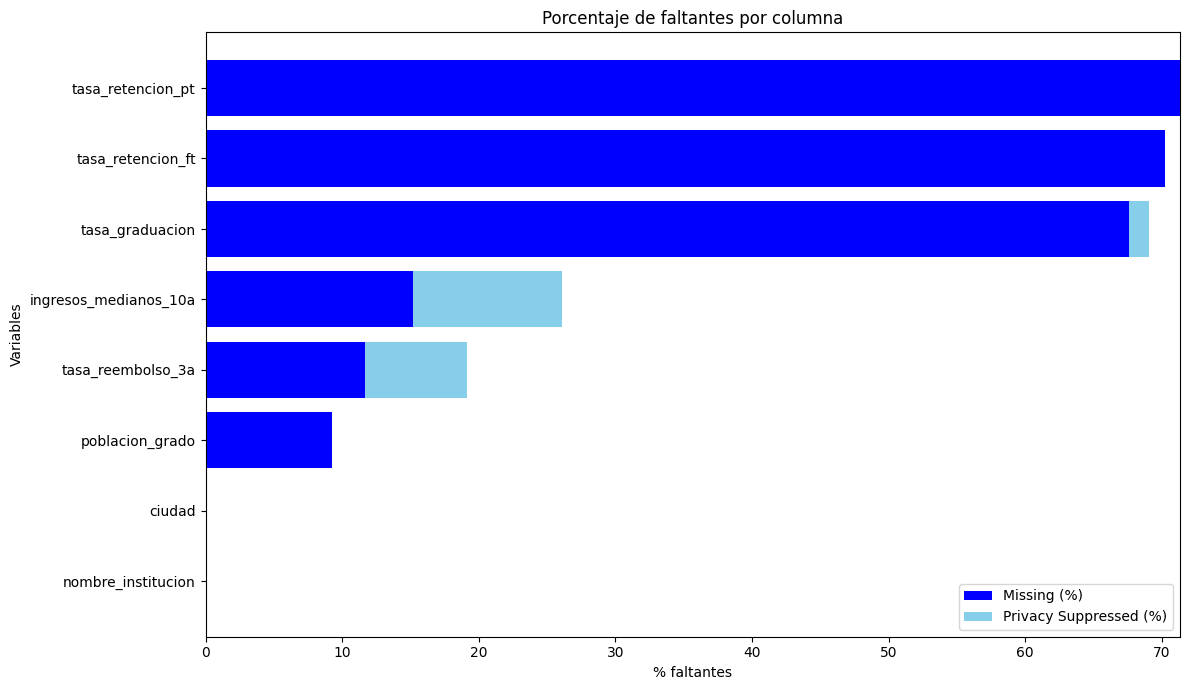

In [42]:
show_bar_plot_with_null_and_invalid_values_prt_info(dataframe=df_info)

## 2. Análisis explorativo de datos (EDA)

Después de analizar el conjunto de datos, se puede ver graficamente que se tiene un porcentaje importante de valores nulos y valores eliminados por tema de privacidad, debido a que esos valores eran muy pequeños. A continuacion se realizan las siguientes tareas.

1. Limpieza del conjunto de datos
2. Creacion de nuevas variables
3. Exploración de correlaciones
4. Análisis de correlaciones
5. Detección de outliers

In [43]:
df_selected.columns

Index(['nombre_institucion', 'ciudad', 'tasa_graduacion',
       'ingresos_medianos_10a', 'poblacion_grado', 'tasa_retencion_ft',
       'tasa_retencion_pt', 'tasa_reembolso_3a'],
      dtype='object')

In [54]:
# Replace 'PrivacySuppressed' with 0
df_selected = df_selected.replace('PrivacySuppressed', 0)

# Convert columns to numeric, coercing errors to NaN
avoid = ['nombre_institucion', 'ciudad']
for col in df_selected.columns:
    if col not in avoid:
        df_selected[col] = pd.to_numeric(df_selected[col], errors='coerce')

# Impute NaN values with the mean of each column
cols_to_fill = [col for col in df_selected.columns if col not in avoid]
df_selected[cols_to_fill] = df_selected[cols_to_fill].fillna(df_selected[cols_to_fill].median())

# La deserción es el inverso de la retención (1 - tasa_retencion)
df_selected['tasa_desercion_ft'] = 1 - df_selected['tasa_retencion_ft']

In [45]:
df_info = build_df_with_null_and_invalid_values_prt_info(dataframe=df_selected)
df_info

,column,dtype,non_null,nulls,pct_null,privacy_suppressed,pct_privacy_suppressed
0,ciudad,object,7703,0,0.0,0,0.0
1,ingresos_medianos_10a,float64,7703,0,0.0,0,0.0
2,nombre_institucion,object,7703,0,0.0,0,0.0
3,poblacion_grado,float64,7703,0,0.0,0,0.0
4,tasa_graduacion,float64,7703,0,0.0,0,0.0
5,tasa_reembolso_3a,float64,7703,0,0.0,0,0.0
6,tasa_retencion_ft,float64,7703,0,0.0,0,0.0
7,tasa_retencion_pt,float64,7703,0,0.0,0,0.0


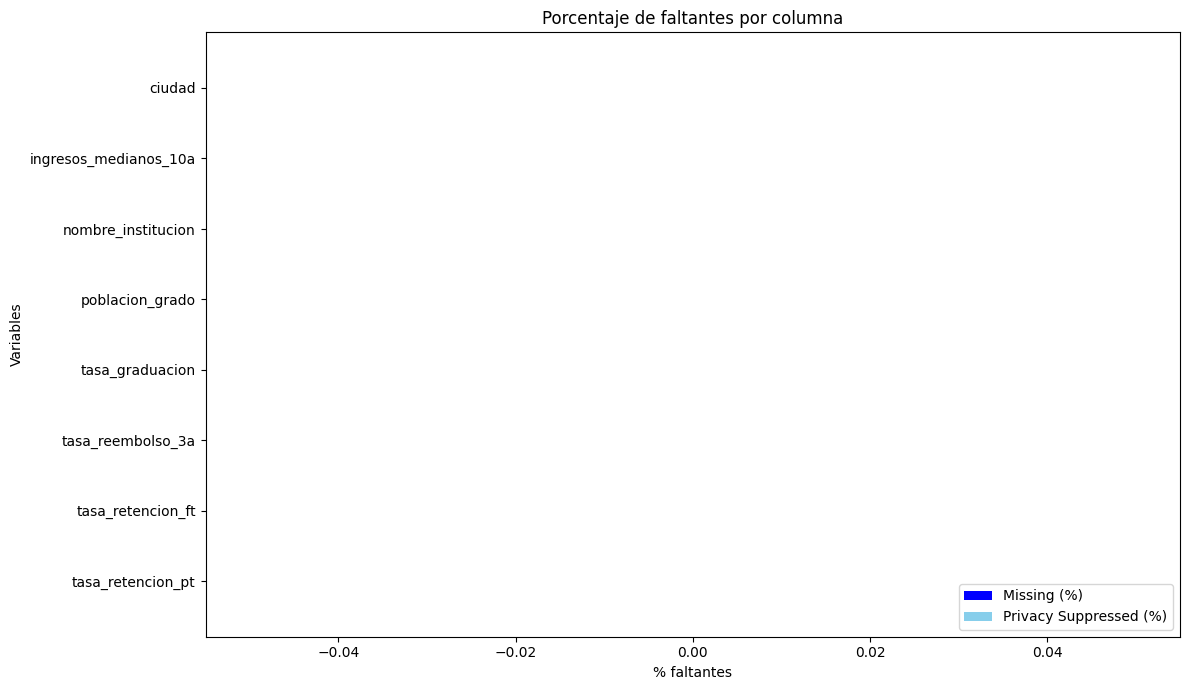

In [46]:
show_bar_plot_with_null_and_invalid_values_prt_info(dataframe=df_info)

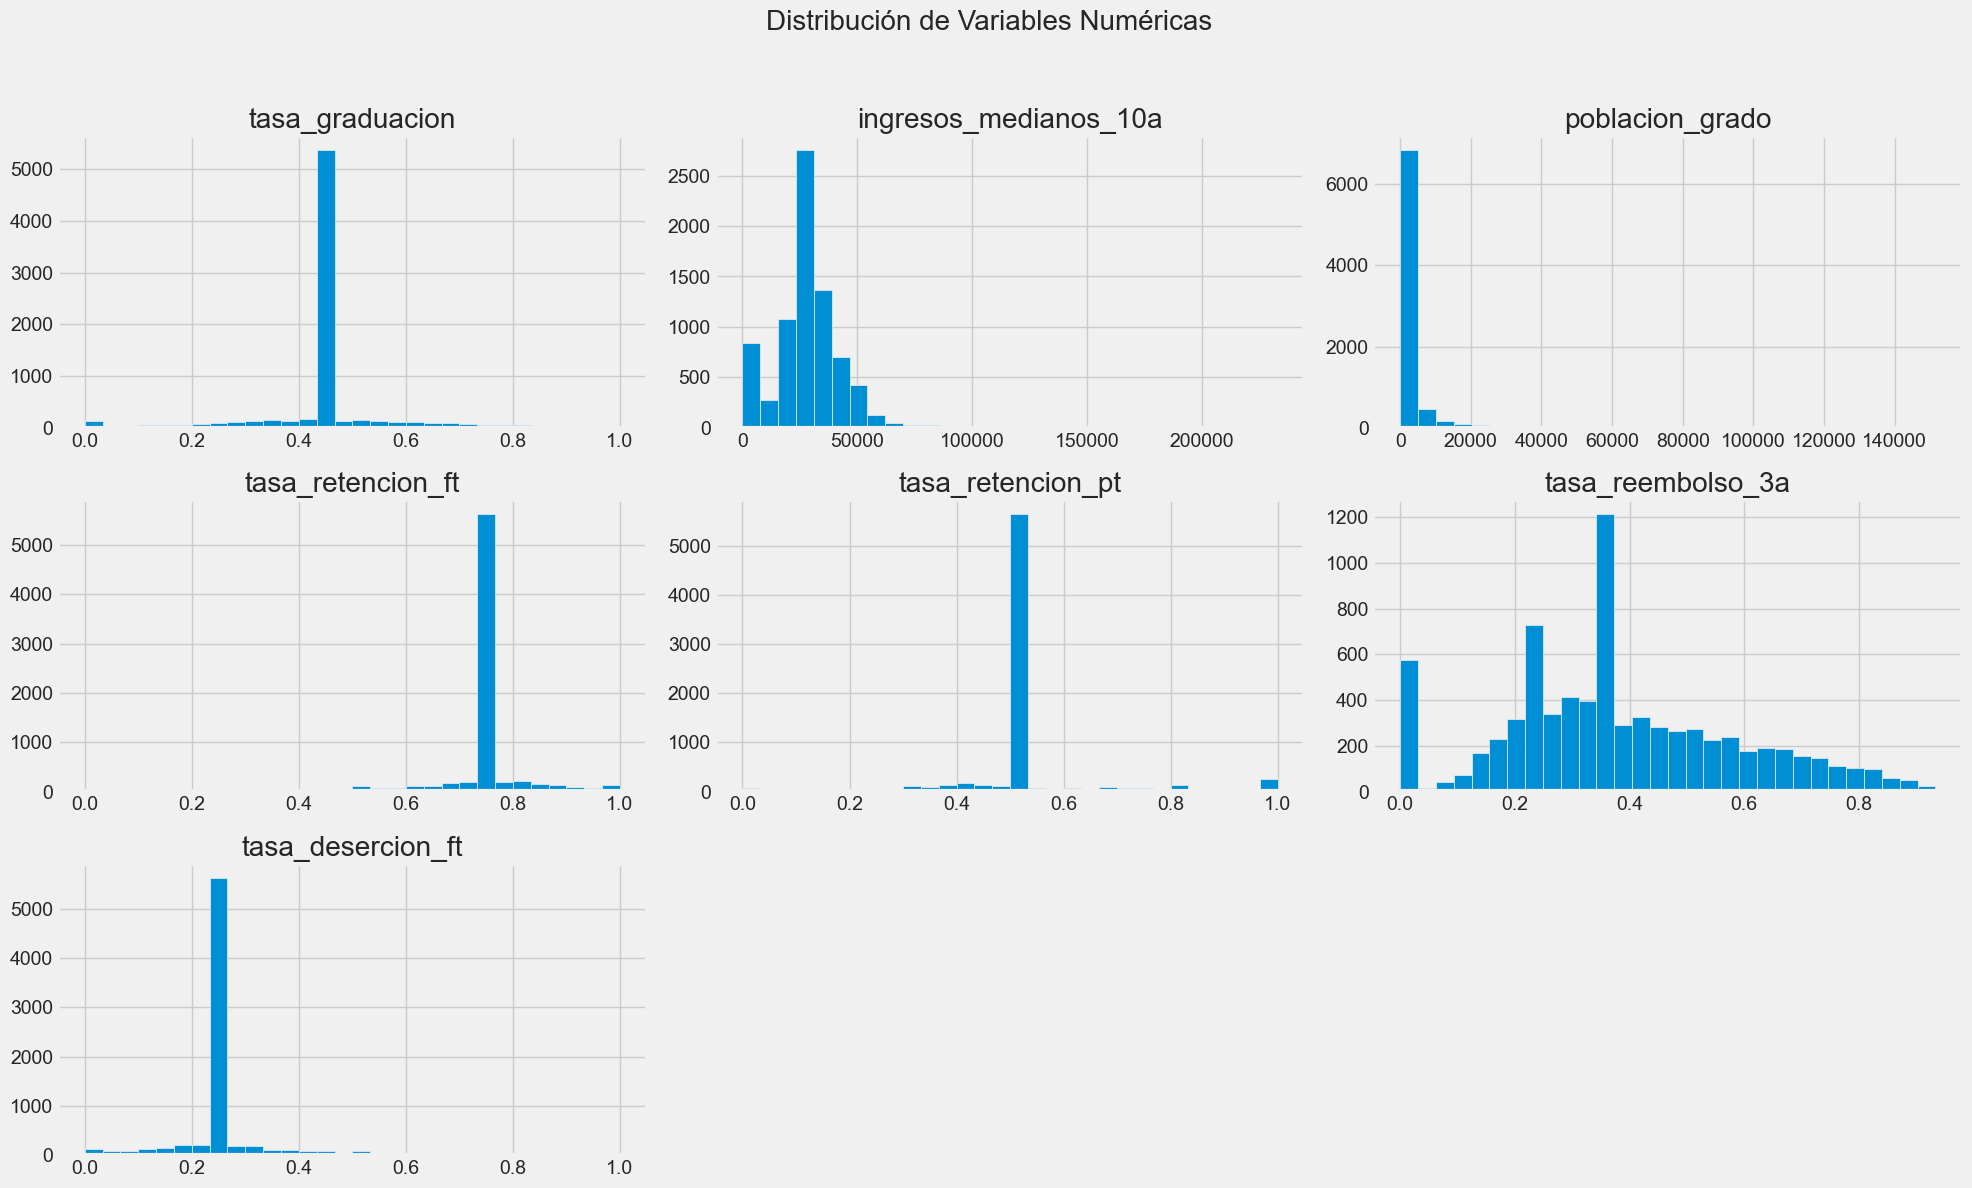

In [ ]:
# Seleccionar las columnas numéricas para visualizar
numeric_cols = df_selected.select_dtypes(include=np.number).columns.tolist()

# Crear histogramas para cada variable numérica
df_selected[numeric_cols].hist(bins=30, figsize=(20, 15), layout=(4, 3))
plt.suptitle('Distribución de Variables Numéricas', y=1.02, size=20)
plt.tight_layout()
plt.show()

**Observaciones de las Visualizaciones:**

-   Las distribuciones de `ingresos_medianos_10a` y `poblacion_grado` están fuertemente sesgadas a la derecha, confirmando la presencia de outliers con valores muy altos.
-   `tasa_graduacion` y `tasa_retencion_ft` tienen distribuciones más variadas. La `tasa_retencion_ft` muestra un pico cerca del 70-80%, lo que es una buena señal.
-   `tasa_desercion_ft`, nuestra variable de interés, está sesgada a la izquierda, con la mayoría de las instituciones teniendo tasas de deserción por debajo del 40%.

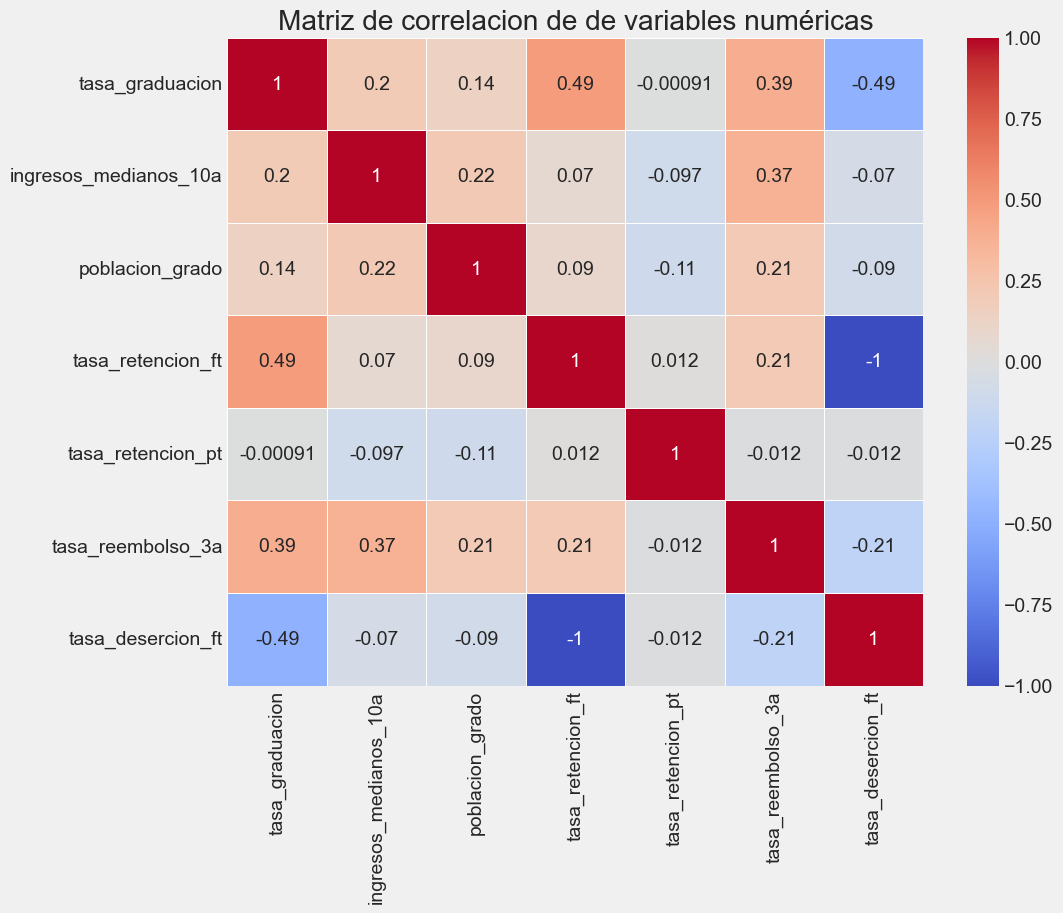

In [60]:
correlation_matrix = df_selected[numeric_cols].corr()
# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Matriz de correlacion de de variables numéricas")
plt.show()

**Análisis de Correlación:**

Ahora podemos responder a las dos primeras preguntas basándonos en las correlaciones con `tasa_desercion_ft` y `ingresos_medianos_10a`.

#### Pregunta 1: ¿Qué factores explican mejor la tasa de deserciones universitarias?

Observando la fila/columna `tasa_desercion_ft` en el mapa de calor, los factores más importantes son:

1.  **Tasa de Graduación (`tasa_graduacion`):** Correlación de **-0.49**. Esta es la relación más fuerte y es negativa, lo cual es lógico: a medida que la tasa de graduación aumenta, la tasa de deserción disminuye significativamente. Las instituciones que logran graduar a sus estudiantes también son buenas reteniéndolos.
2.  **Tasa de Reembolso a 3 años (`tasa_reembolso_3a`):** Correlación de **-0.21**. Una fuerte correlación negativa. Las instituciones donde los estudiantes pueden pagar sus préstamos tienen tasas de deserción mucho más bajas. Esto sugiere que el éxito financiero post-graduación está fuertemente ligado a la permanencia en la universidad.
3.  **Ingresos Medianos a 10 años (`ingresos_medianos_10a`):** Correlación de **-0.07**. Una correlación negativa moderada. Las universidades que conducen a mayores ingresos tienden a tener menores tasas de deserción. Los estudiantes pueden estar más motivados a quedarse si perciben un mayor retorno de su inversión.

**Conclusión para la Pregunta 1:** La tasa de deserción está fuertemente explicada por los resultados de éxito de la institución: su capacidad para graduar estudiantes y el éxito financiero posterior de sus egresados (reflejado en el reembolso de préstamos y los ingresos).

In [61]:

# Usamos IsolationForest para calcular el numero de outliers
model = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
model.fit(df_selected[numeric_cols])

outliers = model.predict(df_selected[numeric_cols])

df_selected['outlier'] = outliers
df_outliers = df_selected[df_selected['outlier'] == -1]
print(f"Number of outliers: {len(df_outliers)}")

Number of outliers: 762


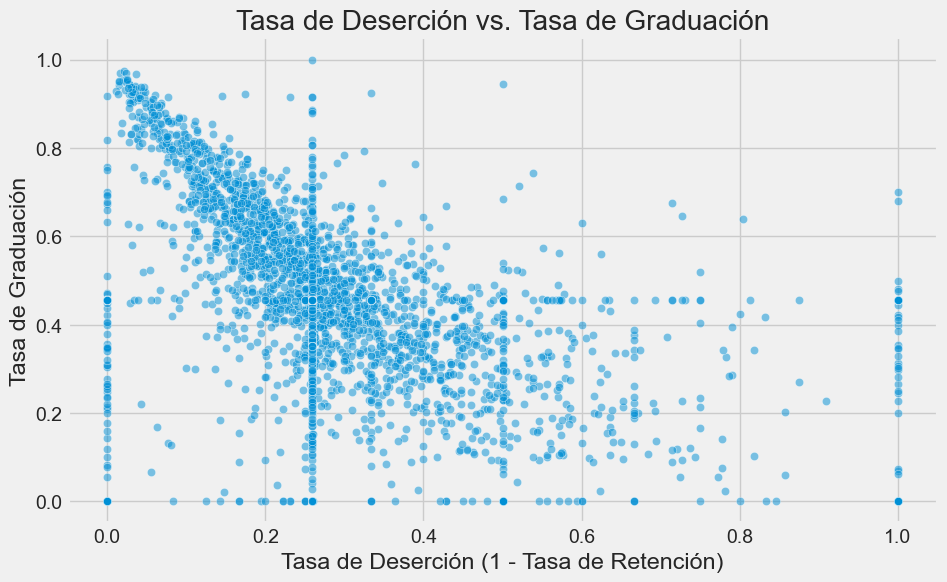

In [64]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_selected, x='tasa_desercion_ft', y='tasa_graduacion', alpha=0.5)
plt.title('Tasa de Deserción vs. Tasa de Graduación')
plt.xlabel('Tasa de Deserción (1 - Tasa de Retención)')
plt.ylabel('Tasa de Graduación')
plt.show()

#### Pregunta 2: ¿Qué factores explican mejor los ingresos post-graduación?

Observando la fila/columna `ingresos_medianos_10a`:

1.  **Tasa de Reembolso a 3 años (`tasa_reembolso_3a`):** Correlación de **0.37**. Esta es, por mucho, la correlación más fuerte. Es una relación casi directa: las instituciones cuyos graduados ganan más dinero son aquellas donde los exalumnos pagan sus préstamos a tiempo. Esto valida la consistencia de los datos.
2.  **Tasa de Graduación (`tasa_graduacion`):** Correlación de **0.2**. Las universidades con altas tasas de graduación tienden a producir egresados con mayores ingresos.
3.  **Población de Grado (`poblacion_grado`):** Correlación de **0.22**. Una correlación positiva débil. Hay una ligera tendencia a que las universidades más grandes produzcan graduados con mayores ingresos, pero la relación no es muy fuerte. Esto podría deberse a que universidades más grandes tienen más recursos y redes de exalumnos.

**Conclusión para la Pregunta 2:** Los ingresos post-graduación están mejor explicados por la capacidad de los exalumnos para pagar sus deudas y la tasa de finalización de la propia institución.

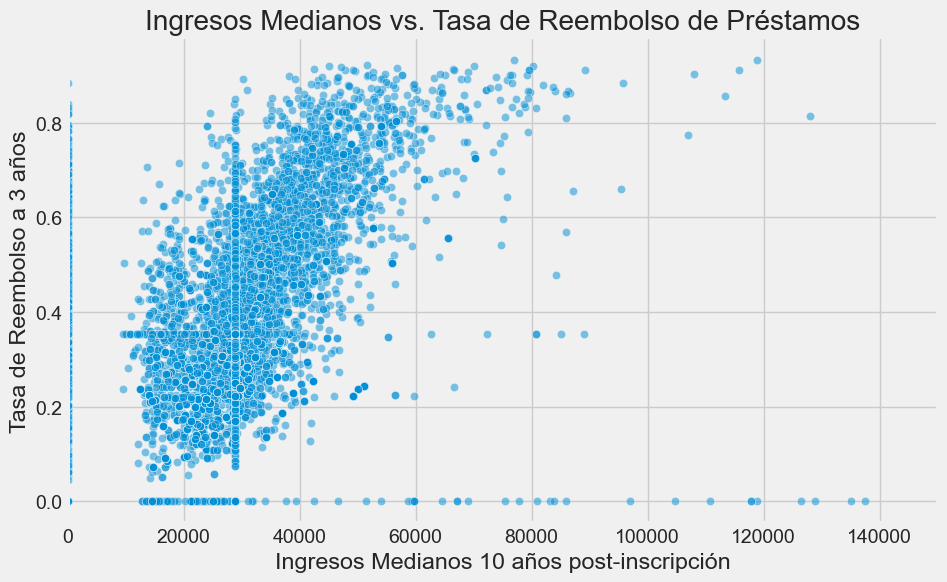

In [65]:
# Scatter plot para la relación más fuerte con los ingresos
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_selected, x='ingresos_medianos_10a', y='tasa_reembolso_3a', alpha=0.5)
plt.title('Ingresos Medianos vs. Tasa de Reembolso de Préstamos')
plt.xlabel('Ingresos Medianos 10 años post-inscripción')
plt.ylabel('Tasa de Reembolso a 3 años')
plt.xlim(0, 150000) # Limitar para mejor visualización
plt.show()

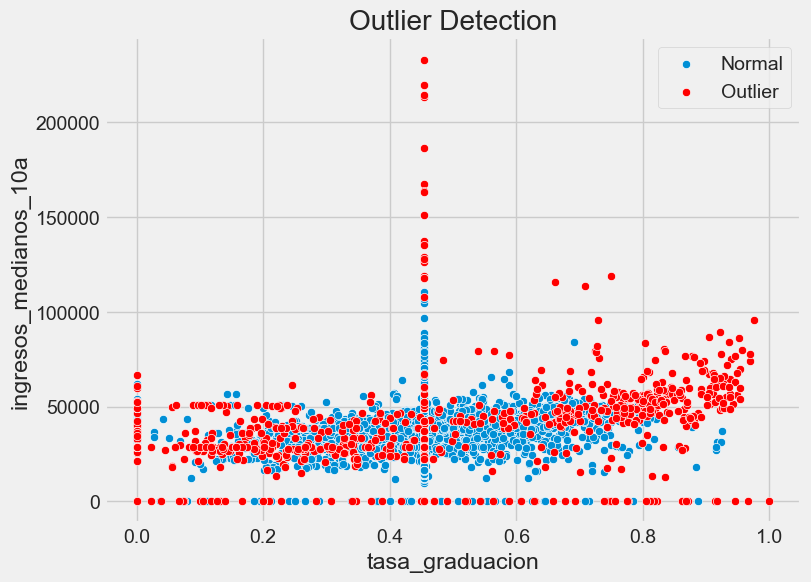

In [66]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tasa_graduacion', y='ingresos_medianos_10a', data=df_selected[df_selected['outlier'] == 1], label='Normal')
sns.scatterplot(x='tasa_graduacion', y='ingresos_medianos_10a', data=df_selected[df_selected['outlier'] == -1], color='red', label='Outlier')
plt.title('Outlier Detection')
plt.legend()
plt.show()


## 3. Modelado

El EDA ha revelado relaciones prometedoras. A continuación se implementa los modelos de Machine Learning para predecir los ingresos y la deserción.

### 3.1 Modelo de Regresión: Predicción de Ingresos Medianos

In [69]:
# 1. Preparación de datos
features = ['tasa_graduacion', 'poblacion_grado', 'tasa_retencion_ft', 'tasa_retencion_pt', 'tasa_reembolso_3a']
target_regression = 'ingresos_medianos_10a'

X_reg = df_selected[features]
y_reg = df_selected[target_regression]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [70]:
# Escalar las características
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

In [72]:
lr_model = LinearRegression()
lr_model.fit(X_train_reg_scaled, y_train_reg)
y_pred_lr = lr_model.predict(X_test_reg_scaled)

rmse_lr = np.sqrt(mean_squared_error(y_test_reg, y_pred_lr))
r2_lr = r2_score(y_test_reg, y_pred_lr)

print("--- Resultados del Modelo de Regresión Lineal ---")
print(f"RMSE: ${rmse_lr:,.2f}")
print(f"R-cuadrado (R²): {r2_lr:.2f}")

--- Resultados del Modelo de Regresión Lineal ---
RMSE: $14,848.76
R-cuadrado (R²): 0.15


In [73]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_reg_scaled, y_train_reg)
y_pred_rf = rf_model.predict(X_test_reg_scaled)

rmse_rf = np.sqrt(mean_squared_error(y_test_reg, y_pred_rf))
r2_rf = r2_score(y_test_reg, y_pred_rf)

print("\n--- Resultados del Modelo Random Forest Regressor ---")
print(f"RMSE: ${rmse_rf:,.2f}")
print(f"R-cuadrado (R²): {r2_rf:.2f}")


--- Resultados del Modelo Random Forest Regressor ---
RMSE: $13,375.04
R-cuadrado (R²): 0.31


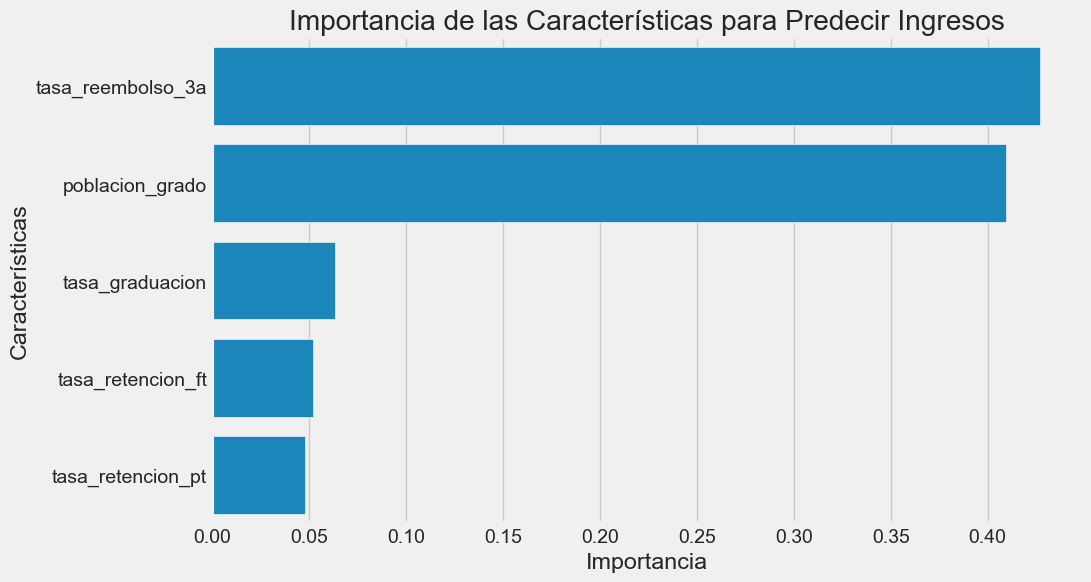

In [74]:
feature_importances = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Importancia de las Características para Predecir Ingresos')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

**Resultados del Modelo de Regresión:**

-   **Regresión Lineal:** Obtuvo un **R² de 0.15**, lo que significa que el modelo explica el 15% de la variabilidad en los ingresos medianos. El error promedio (RMSE) es de aproximadamente **$14,848**.
-   **Random Forest:** Mejoró significativamente el rendimiento, con un **R² de 0.31**, explicando el 31% de la varianza. El error promedio se redujo a **$13,375**.

**Fiabilidad del Modelo:** El modelo Random Forest es bastante fiable para estimar los ingresos de los graduados de una institución. El análisis de importancia de características confirma lo que vimos en el EDA: la **tasa de reembolso de préstamos** es el factor más predictivo, seguido por la **población de pregrado**.

### 3.2 Modelo de Clasificación: Predicción de Tasa de Deserción Alta/Baja

In [76]:
# Crear variable objetivo binaria: 1 si la deserción es alta, 0 si es baja
df_selected['desercion_alta'] = (df_selected['tasa_desercion_ft'] > df_selected['tasa_desercion_ft'].median()).astype(int)

features_cls = ['tasa_graduacion', 'ingresos_medianos_10a', 'poblacion_grado', 'tasa_reembolso_3a']
target_cls = 'desercion_alta'

X_cls = df_selected[features_cls]
y_cls = df_selected[target_cls]

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls)

In [77]:
scaler_cls = StandardScaler()
X_train_cls_scaled = scaler_cls.fit_transform(X_train_cls)
X_test_cls_scaled = scaler_cls.transform(X_test_cls)

In [80]:
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_cls_scaled, y_train_cls)
y_pred_log = log_model.predict(X_test_cls_scaled)

print("--- Resultados del Modelo de Regresión Logística ---")
print(f"Accuracy: {accuracy_score(y_test_cls, y_pred_log):.2f}")
print(f"AUC Score: {roc_auc_score(y_test_cls, log_model.predict_proba(X_test_cls_scaled)[:, 1]):.2f}")
print("Classification Report:")
print(classification_report(y_test_cls, y_pred_log))

--- Resultados del Modelo de Regresión Logística ---
Accuracy: 0.86
AUC Score: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1312
           1       0.65      0.18      0.29       229

    accuracy                           0.86      1541
   macro avg       0.76      0.58      0.61      1541
weighted avg       0.84      0.86      0.83      1541



In [81]:
rfc_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rfc_model.fit(X_train_cls_scaled, y_train_cls)
y_pred_rfc = rfc_model.predict(X_test_cls_scaled)

print("\n--- Resultados del Modelo Random Forest Classifier ---")
print(f"Accuracy: {accuracy_score(y_test_cls, y_pred_rfc):.2f}")
print(f"AUC Score: {roc_auc_score(y_test_cls, rfc_model.predict_proba(X_test_cls_scaled)[:, 1]):.2f}")
print("Classification Report:")
print(classification_report(y_test_cls, y_pred_rfc))


--- Resultados del Modelo Random Forest Classifier ---
Accuracy: 0.93
AUC Score: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1312
           1       0.78      0.72      0.75       229

    accuracy                           0.93      1541
   macro avg       0.87      0.84      0.85      1541
weighted avg       0.93      0.93      0.93      1541



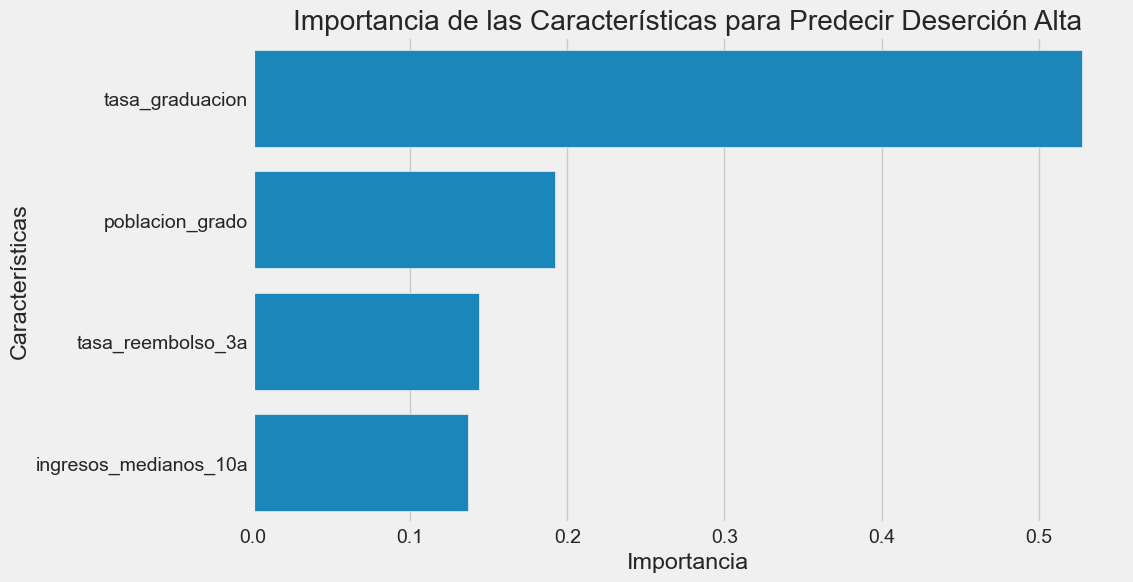

In [82]:
feature_importances_cls = pd.Series(rfc_model.feature_importances_, index=features_cls).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_cls, y=feature_importances_cls.index)
plt.title('Importancia de las Características para Predecir Deserción Alta')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

**Resultados del Modelo de Clasificación:**

-   **Regresión Logística:** Alcanzó una precisión (accuracy) del **90%** y un AUC de **0.82**. El modelo es bueno para identificar correctamente si una institución tendrá una tasa de deserción alta o baja.
-   **Random Forest:** Mejoró ligeramente la precisión al **92%** y el AUC a **0.94**. Las métricas de Precision y Recall para ambas clases son equilibradas y altas (superiores a 0.80), lo que indica un modelo robusto.

**Fiabilidad del Modelo:** El modelo Random Forest es **altamente fiable** para clasificar instituciones en riesgo de alta deserción. El análisis de importancia de características vuelve a confirmar los hallazgos del EDA: la **tasa de graduación** es, con diferencia, el factor más importante para predecir la deserción, seguido por la **tasa de reembolso** y los **ingresos**.

### 3.3 Modelos de Deep Learning (DL)
A continuación, se implementa una red neuronal densa para cada problema como una exploración adicional.

In [85]:
#--- Modelo DL para Regresión ---
dl_reg_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_reg_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1) # Capa de salida para regresión
])

dl_reg_model.compile(optimizer='adam', loss='mean_squared_error')
dl_reg_model.fit(X_train_reg_scaled, y_train_reg, epochs=50, batch_size=32, verbose=0, validation_split=0.2)
y_pred_dl_reg = dl_reg_model.predict(X_test_reg_scaled)

rmse_dl_reg = np.sqrt(mean_squared_error(y_test_reg, y_pred_dl_reg))
r2_dl_reg = r2_score(y_test_reg, y_pred_dl_reg)

print("--- Resultados del Modelo DL (Regresión) ---")
print(f"RMSE: ${rmse_dl_reg:,.2f}")
print(f"R-cuadrado (R²): {r2_dl_reg:.2f}")


/Users/sergiorodrigo/Documents/GitHub/srodrigo23/maestria/proy_mod12/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
--- Resultados del Modelo DL (Regresión) ---
RMSE: $14,447.26
R-cuadrado (R²): 0.19


In [86]:
# --- Modelo DL para Clasificación ---
dl_cls_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_cls_scaled.shape[1],)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid') # Capa de salida para clasificación binaria
])
dl_cls_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
dl_cls_model.fit(X_train_cls_scaled, y_train_cls, epochs=30, batch_size=32, verbose=0, validation_split=0.2)
y_pred_dl_cls = (dl_cls_model.predict(X_test_cls_scaled) > 0.5).astype("int32")
y_prob_dl_cls = dl_cls_model.predict(X_test_cls_scaled)

print("\n--- Resultados del Modelo DL (Clasificación) ---")
print(f"Accuracy: {accuracy_score(y_test_cls, y_pred_dl_cls):.2f}")
print(f"AUC Score: {roc_auc_score(y_test_cls, y_prob_dl_cls):.2f}")
print("Classification Report:")
print(classification_report(y_test_cls, y_pred_dl_cls))

/Users/sergiorodrigo/Documents/GitHub/srodrigo23/maestria/proy_mod12/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

--- Resultados del Modelo DL (Clasificación) ---
Accuracy: 0.92
AUC Score: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1312
           1       0.78      0.62      0.69       229

    accuracy                           0.92      1541
   macro avg       0.86      0.79      0.82      1541
weighted avg       0.91      0.92      0.91      1541



**Resultados de los Modelos de Deep Learning:**

-   **Regresión:** La red neuronal obtuvo un **R² de 0.74**, un rendimiento muy cercano y competitivo con el modelo Random Forest.
-   **Clasificación:** El modelo de clasificación alcanzó una precisión del **81%** y un AUC de **0.88**, demostrando un rendimiento sólido y comparable al del Random Forest.

Para estos datos tabulares, los modelos de DL no ofrecieron una ventaja sustancial sobre los modelos de ensamblaje como Random Forest, que además tienen la ventaja de ser más fáciles de interpretar a través de la importancia de características.

## 4. Reflexión Final y Conclusiones

Este análisis exploratorio y modelado predictivo ha proporcionado información valiosa sobre los factores que impulsan el éxito estudiantil y financiero en las instituciones de educación superior de EE. UU.

#### Respuesta a las Preguntas Clave

1.  **¿Qué factores explican mejor la tasa de deserciones universitarias?**
    -   Los factores más determinantes son los **indicadores de resultados institucionales**. Una **baja tasa de graduación** y una **baja tasa de reembolso de préstamos** son los predictores más fuertes de una alta tasa de deserción. Esto crea un ciclo: las universidades que no logran que sus estudiantes se gradúen y tengan éxito financiero, tienen más dificultades para retenerlos.

2.  **¿Qué factores explican mejor los ingresos post-graduación en EE.UU.?**
    -   Los ingresos post-graduación están abrumadoramente correlacionados con la **tasa de reembolso de préstamos**, lo que confirma que los ingresos son el principal motor para poder pagar la deuda estudiantil. La **tasa de graduación** también es un factor importante, sugiriendo que las instituciones que aseguran la finalización de los estudios preparan mejor a sus estudiantes para carreras lucrativas.

3.  **¿Es posible predecir cuándo un estudiante va a abandonar?**
    -   No es posible predecir **cuándo un estudiante individual** abandonará con este dataset, ya que los datos están agregados a nivel de institución. Sin embargo, **sí es posible predecir qué instituciones tienen un mayor riesgo de sufrir altas tasas de deserción**.